# LEARNING NETWORKS AND MODELS

In machine learning, a category in a classification problem is called a class. Data
points are called samples. The class associated with a specific sample is called a
label.

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
test_labels[:]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

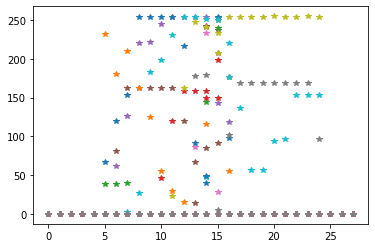

In [3]:
import matplotlib.pyplot as plt
plt.plot(train_images[2],'*')
plt.show()

our network consists of a sequence of two Dense layers, which are densely
connected (also called fully connected) neural layers. The second (and last) layer is a
10-way softmax layer, which means it will return an array of 10 probability scores (sum-
ming to 1). Each score will be the probability that the current digit image belongs to
one of our 10 digit classes.

In [4]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

To make the network ready for training, we need to pick three more things, as part
of the compilation step:<br>
A loss function—How the network will be able to measure its performance on
the training data, and thus how it will be able to steer itself in the right direction.<br>
An optimizer—The mechanism through which the network will update itself
based on the data it sees and its loss function.<br>
Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified)

In [5]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network
expects and scaling it so that all values are in the [0, 1] interval. Previously, our train-
ing images, for instance, were stored in an array of shape (60000, 28, 28) of type
uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

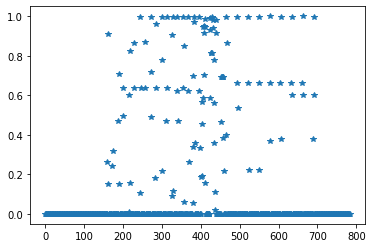

In [7]:
plt.plot(train_images[2],'*')
plt.show()

We also need to categorically encode the labels

In [8]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
test_labels[:]

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

We’re now ready to train the network, which in Keras is done via a call to the net-
work’s fit method—we fit the model to its training data:

In [10]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2557 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1030 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0677 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0495 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0378 - accuracy: 0.9885


Two quantities are displayed during training: the loss of the network over the training
data, and the accuracy of the network over the training data.
We quickly reach an accuracy of 0.989 (98.9%) on the training data. Now let’s
check that the model performs well on the test set, too:

In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 906us/step - loss: 0.0898 - accuracy: 0.9727


The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training
set accuracy. This gap between training accuracy and test accuracy is an example of
overfitting: the fact that machine-learning models tend to perform worse on new data
than on their training data.

In [13]:
print('test_acc:', test_acc)

test_acc: 0.9726999998092651


## TESTING/TUNING THE MODEL

In [14]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3961 - accuracy: 0.8881
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1174 - accuracy: 0.9663
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0787 - accuracy: 0.9765
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0580 - accuracy: 0.9825
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9787
test_acc: 0.9786999821662903


A tensor has main three attributes: <br> Number of axes also called RANK  which is give by .ndim <br>Shape is a tuple to show spans on each axis of the tensor and <br> Data type given by dtype in python 

In [15]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

2
(60000, 784)
float32


Let’s display the fourth digit in this 3D tensor, using the library Matplotlib (part of
the standard scientific Python suite)

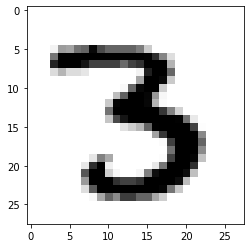

In [16]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = train_images[12]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

Selecting a part of a tensor is called tensor slicing. Some examples:

In [17]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [18]:
my_slice = train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [19]:
my_slice = train_images[10:11,0:21,2:17]
my_slice.shape

(1, 21, 15)

In order to crop the
images to patches of 14 × 14 pixels centered in the middle, you do this:



In [20]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

The first axis is called the sample axis used to batch data into various sizes. The batch tensor's first axix is called the batch axis.

The imdb dataset comes pakaged with keras.It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary. To load the IMDB dataset:

# BINARY CLASSIFICATION

In [21]:
from keras.datasets import imdb
(train_data,train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/sironton/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sironton/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data.The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [22]:
train_data[0];

In [23]:
train_labels[0] 

1

The maximum entry id 9999 because we are selecting only 10 thousand words

In [24]:
max([max(sequence) for sequence in train_data])

9999

To decode back to english:

In [25]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(
    reverse_word_index.get(i-3, '?') for i in train_data[0])

The i-3 is because 0 1 and 2 are resrved for padding start of sequence and unknown

In [26]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## preparing data

Data must be converted to tensors before feeding them to a neural network. There are two ways to do that : <br>Pad your lists so that they all have the same length, turn them into an integer
tensor of shape (samples, word_indices) , and then use as the first layer in
your network a layer capable of handling such integer tensors (the Embedding
layer, which we’ll cover in detail later in the book).
<br>One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vec-
tor that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.<br> We will go with the 2nd one:

In [27]:
import numpy as np
def vectorise_seq(seq, dim=10000):
    results = np.zeros([len(seq),10000])
    for i, seq in enumerate(seq):
        results[i,seq]=1
    return results

x_train = vectorise_seq(train_data)
x_test = vectorise_seq(test_data)

Also vectorise the labels.

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup
you’ll ever encounter. A type of network that performs well on such a problem is
a simple stack of fully connected ( Dense ) layers with relu activations: Dense(16,
activation='relu') .<br>You
can intuitively understand the dimensionality of your representation space as “how
much freedom you’re allowing the network to have when learning internal representations.”<br>
There are two key architecture decisions to be made about such a stack of Dense layers:
 How many layers to use
 How many hidden units to choose for each layer


## The network

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Because you’re facing a binary classification problem and the output of your network is a probability (you end your network with a single-unit layer with a sigmoid activation), it’s best to use the binary_crossentropy loss. It isn’t the only viable choice: you could use, for instance, mean_squared_error . But crossentropy is usually the best choice when you’re dealing with models that output probabilities.

In [30]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

You’ll now train the model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
passing the validation data as the validation_data argument.

In [32]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/10
30/30 [==============================] - 1s 35ms/step - loss: 0.5013 - acc: 0.7883 - val_loss: 0.3704 - val_acc: 0.8696
Epoch 2/10
30/30 [==============================] - 0s 14ms/step - loss: 0.2897 - acc: 0.9074 - val_loss: 0.2948 - val_acc: 0.8886
Epoch 3/10
30/30 [==============================] - 0s 14ms/step - loss: 0.2168 - acc: 0.9296 - val_loss: 0.2965 - val_acc: 0.8812
Epoch 4/10
30/30 [==============================] - 1s 17ms/step - loss: 0.1706 - acc: 0.9450 - val_loss: 0.2727 - val_acc: 0.8919
Epoch 5/10
30/30 [==============================] - 1s 17ms/step - loss: 0.1402 - acc: 0.9549 - val_loss: 0.2855 - val_acc: 0.8874
Epoch 6/10
30/30 [==============================] - 0s 15ms/step - loss: 0.1137 - acc: 0.9662 - val_loss: 0.3119 - val_acc: 0.8828
Epoch 7/10
30/30 [==============================] - 0s 15ms/step - loss: 0.0944 - acc: 0.9734 - val_loss: 0.3151 - val_acc: 0.8831
Epoch 8/10
30/30 [==============================] - 0s 16ms/step - loss: 0.0772 - a

Note that the call to model.fit() returns a History object. This object has a mem-
ber history , which is a dictionary containing data about everything that happened
during training

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

The dictionary contains four entries: one per metric that was being monitored during training and during validation. In the following two listing, let’s use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy

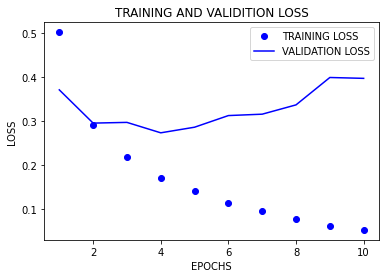

In [34]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values,'bo', label='TRAINING LOSS')
plt.plot(epochs , val_loss_values ,'b', label ='VALIDATION LOSS')
plt.title('TRAINING AND VALIDITION LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5263 - acc: 0.7785 - val_loss: 0.3834 - val_acc: 0.8730
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2995 - acc: 0.9012 - val_loss: 0.3107 - val_acc: 0.8773
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2214 - acc: 0.9275 - val_loss: 0.3164 - val_acc: 0.8699
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1755 - acc: 0.9435 - val_loss: 0.2819 - val_acc: 0.8877
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1440 - acc: 0.9527 - val_loss: 0.2809 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1189 - acc: 0.9641 - val_loss: 0.3164 - val_acc: 0.8815
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0976 - acc: 0.9710 - val_loss: 0.3071 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0796 - a

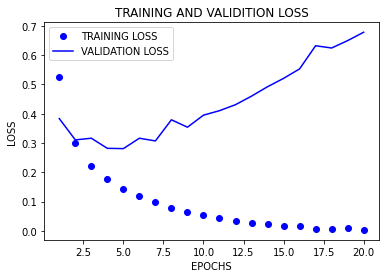

In [35]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))


history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values,'bo', label='TRAINING LOSS')
plt.plot(epochs , val_loss_values ,'b', label ='VALIDATION LOSS')
plt.title('TRAINING AND VALIDITION LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

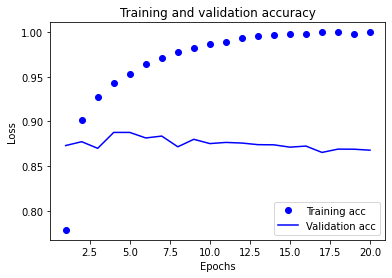

In [36]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradient-
descent optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of what we warned against earlier: a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you’re seeing is overfit-
ting : after the second epoch, you’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.<br>Let’s train a new network from scratch for four epochs and then evaluate it on the
test data:

In [37]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4548 - accuracy: 0.8163
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2589 - accuracy: 0.9070
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2005 - accuracy: 0.9282
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2938 - accuracy: 0.8844


In [38]:
results

[0.29376184940338135, 0.8843600153923035]

## predictions

In [39]:
 predictions = model.predict(x_test)

In [40]:
predictions

array([[0.18560115],
       [0.99937797],
       [0.8966795 ],
       ...,
       [0.11481503],
       [0.07801011],
       [0.60594153]], dtype=float32)

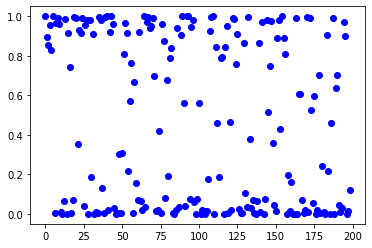

In [41]:
plt.plot(predictions[1:200],'bo')
plt.show()

# MULTICLASS CLASSIFICATION

In this section, you’ll build a network to classify Reuters newswires into 46 mutually
exclusive topics. Because you have many classes, this problem is an instance of multi-
class classification; and because each data point should be classified into only one cate-
gory, the problem is more specifically an instance of single-label, multiclass classification.
If each data point could belong to multiple categories (in this case, topics), you’d be
facing a multilabel, multiclass classification problem.

You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training se

In [42]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

/home/sironton/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sironton/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [43]:
print(len(train_data),len(test_data))

8982 2246


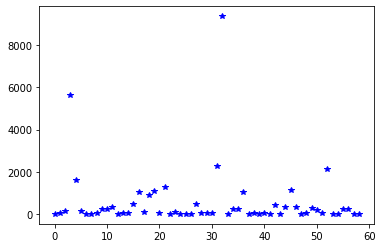

In [44]:
plt.plot(train_data[11],'b*')

In [45]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value)
                           in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?')
                             for i in train_data[11]])

In [46]:
decoded_newswire

'? lt international thomson organisation ltd said it will report financial results in u s funds rather than sterling beginning from jan 1 1987 it said the change will not be applied retroactively to prior financial periods the company said as a result of recent investments most of its assets now are located in the united states reuter 3'

## PREPERATION OF DATA

In [47]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of
the labels consists of embedding each label as an all-zero vector with a 1 in the place of
the label index.

In [48]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras, which you’ve already seen in action
in the MNIST example:

In [49]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## BUILDING YOUR NETWORK

This topic-classification problem looks similar to the previous movie-review classification problem: in both cases, you’re trying to classify short snippets of text. But there is
a new constraint here: the number of output classes has gone from 2 to 46.
In a stack of Dense layers like that you’ve been using, each layer can only access infor-
mation present in the output of the previous layer. If one layer drops some information
relevant to the classification problem, this information can never be recovered by later
layers: each layer can potentially become an information bottleneck. In the previous
example, you used 16-dimensional intermediate layers, but a 16-dimensional space may
be too limited to learn to separate 46 different classes: such small layers may act as infor-
mation bottlenecks, permanently dropping relevant information.
For this reason you’ll use larger layers. Let’s go with 64 units.

In [50]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

You end the network with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector.The last layer uses a softmax activation.It means the network will output a probability distribution over the 46
different output classes.<br>The best loss function to use in this case is categorical_crossentropy . It measures
the distance between two probability distributions: here, between the probability dis-
tribution output by the network and the true distribution of the labels. By minimizing
the distance between these two distributions, you train the network to output some-
thing as close as possible to the true labels.

In [51]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [53]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 39ms/step - loss: 2.6836 - accuracy: 0.5641 - val_loss: 1.7654 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.4398 - accuracy: 0.7100 - val_loss: 1.3041 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.0515 - accuracy: 0.7711 - val_loss: 1.1261 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8250 - accuracy: 0.8259 - val_loss: 1.0200 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6628 - accuracy: 0.8632 - val_loss: 0.9466 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5294 - accuracy: 0.8925 - val_loss: 0.9127 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4284 - accuracy: 0.9127 - val_loss: 0.8774 - val_accuracy: 0.8130
Epoch 8/20
16

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

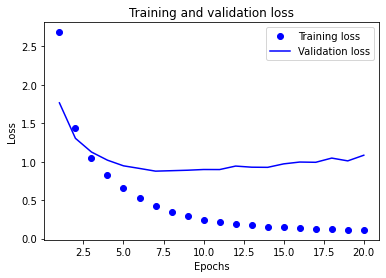

In [55]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

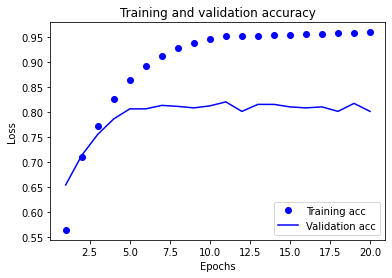

In [56]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

In [57]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 3s 158ms/step - loss: 2.6657 - accuracy: 0.5309 - val_loss: 1.7346 - val_accuracy: 0.6460
Epoch 2/9
16/16 [==============================] - 0s 26ms/step - loss: 1.4181 - accuracy: 0.7129 - val_loss: 1.2860 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 25ms/step - loss: 1.0354 - accuracy: 0.7864 - val_loss: 1.1492 - val_accuracy: 0.7470
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8103 - accuracy: 0.8345 - val_loss: 1.0357 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 25ms/step - loss: 0.6517 - accuracy: 0.8662 - val_loss: 0.9704 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 0s 23ms/step - loss: 0.5226 - accuracy: 0.8920 - val_loss: 0.9282 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 20ms/step - loss: 0.4206 - accuracy: 0.9102 - val_loss: 0.9148 - val_accuracy: 0.8170
Epoch 8/9
16/16 [==

In [58]:
results

[0.9979037046432495, 0.7827248573303223]

In [59]:
predictions = model.predict(x_test)

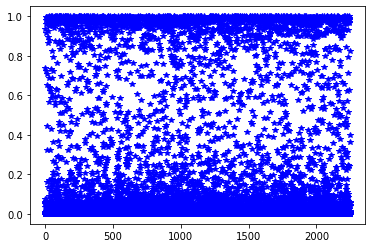

In [60]:
plt.plot(predictions,'b*')
plt.show()

In [61]:
y_test.shape

(25000,)

In [62]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1731967943009795

In [63]:
predictions[0].shape

(46,)

In [64]:
np.sum(predictions[0])

1.0

In [65]:
np.argmax(predictions[0])

3

another way to encode the labels would be to cast them as
an integer tensor, like this:

In [66]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss
function used in listing 3.21, categorical_crossentropy , expects the labels to follow
a categorical encoding. With integer labels, you should use sparse_categorical_
crossentropy :<br><br>
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',
metrics=['acc'])

We mentioned earlier that because the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what
happens when you introduce an information bottleneck by having intermediate layers
that are significantly less than 46-dimensional: for example, 4-dimensional.

In [67]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.9570 - accuracy: 0.3834 - val_loss: 2.1279 - val_accuracy: 0.5890
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.7046 - accuracy: 0.6210 - val_loss: 1.5854 - val_accuracy: 0.6140
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.3465 - accuracy: 0.6695 - val_loss: 1.4481 - val_accuracy: 0.6460
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1525 - accuracy: 0.7003 - val_loss: 1.3631 - val_accuracy: 0.6630
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0190 - accuracy: 0.7397 - val_loss: 1.3267 - val_accuracy: 0.6810
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9194 - accuracy: 0.7620 - val_loss: 1.3169 - val_accuracy: 0.6890
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.8405 - accuracy: 0.7796 - val_loss: 1.3250 - val_accuracy: 0.6970
Epoch 8/20
63/63

In [68]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 1ms/step - loss: 2.0330 - accuracy: 0.7004


In [69]:
results

[2.033022880554199, 0.7003561854362488]

The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.

## SUMMARY
If you’re trying to classify data points among N classes, your network should enD
with a Dense layer of size N .<br>
In a single-label, multiclass classification problem, your network should end
with a softmax activation so that it will output a probability distribution over the
N output classes.<br>
Categorical crossentropy is almost always the loss function you should use for
such problems. It minimizes the distance between the probability distributions
output by the network and the true distribution of the targets.
There are two ways to handle labels in multiclass classification:<br>
– Encoding the labels via categorical encoding (also known as one-hot encod-
ing) and using categorical_crossentropy as a loss function<br>
– Encoding the labels as integers and using the sparse_categorical_crossentropy
loss function<br>
If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your network due to intermediate layers
that are too small.

# REGRESSION

Another common type of
machine-learning problem is regression, which consists of predicting a continuous
value instead of a discrete label: for instance, predicting the temperature tomorrow,
given meteorological data; or predicting the time that a software project will take to
complete, given its specifications.

In [70]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

The dataset you’ll use has an interesting difference
from the two previous examples. It has relatively few data points: only 506, split
between 404 training samples and 102 test samples. And each feature in the input data
(for example, the crime rate) has a different scale. For instance, some values are pro-
portions, which take values between 0 and 1; others take values between 1 and 12, oth-
ers between 0 and 100, and so on.

In [71]:
train_data.shape,test_data.shape

((404, 13), (102, 13))

## PREPARING DATA
It would be problematic to feed into a neural network values that all take wildly differ-
ent ranges. The network might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
to deal with such data is to do feature-wise normalization: for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and
divide by the standard deviation, so that the feature is centered around 0 and has a
unit standard deviation. This is easily done in Numpy.

In [72]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## BUILDING NETWORK
Because so few samples are available, you’ll use a very small network with two hidden
layers, each with 64 units. In general, the less training data you have, the worse overfit-
ting will be, and using a small network is one way to mitigate overfitting.

In [73]:
from keras import models
from keras import layers

In [74]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

The network ends with a single unit and no activation (it will be a linear layer). This is
a typical setup for scalar regression (a regression where you’re trying to predict a single
continuous value). Applying an activation function would constrain the range the out-
put can take; for instance, if you applied a sigmoid activation function to the last layer,
the network could only learn to predict values between 0 and 1. Here, because the last
layer is purely linear, the network is free to learn to predict values in any range.<br>Note that you compile the network with the mse loss function—mean squared error,
the square of the difference between the predictions and the targets. This is a widely
used loss function for regression problems.
You’re also monitoring a new metric during training: mean absolute error ( MAE ). It’s
the absolute value of the difference between the predictions and the targets. For
instance, an MAE of 0.5 on this problem would mean your predictions are off by $500
on average

## VALIDATING THE APROACH
Because you have so few data points,
the validation set would end up being very small.As a consequence, the validation scores might change a lot depending on which data
points you chose to use for validation and which you chose for training: the validation
scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model.
<br>
The best practice in such situations is to use K -fold cross-validation (see figure 3.11).
It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on
the remaining partition. The validation score for the model used is then the average of
the K validation scores obtained. In terms of code, this is straightforward.

In [75]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    #preparing the valisition data
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: 
                          (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:
                                (i + 1) * num_val_samples]
    #prepares training data
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1)* num_val_samples:]],axis=0)
    
    #build the model and train
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    #evaluate the training data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [76]:
all_scores

[2.07364559173584, 2.322814464569092, 2.7741858959198, 2.3118882179260254]

In [77]:
np.mean(all_scores)

2.370633542537689

The different runs do indeed show rather different validation scores, from 2.6 to 3.2.
The average (2.7) is a much more reliable metric than any single score—that’s the
entire point of K-fold cross-validation. In this case, you’re off by 3,000 on average,
which is significant considering that the prices range from 10,000 to 50,000.
<br>
Let’s try training the network a bit longer: 500 epochs. To keep a record of how
well the model does at each epoch, you’ll modify the training loop to save the per-
epoch validation score log.

In [78]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: 
                          (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:
                                (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [79]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [80]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) 
                       for i in range(num_epochs)]

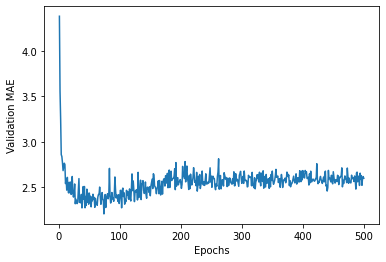

In [81]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a little difficult to see the plot, due to scaling issues and relatively high variance. Let’s do the following:
<br>Omit the first 10 data points, which are on a different scale than the rest of the curve.
<br>Replace each point with an exponential moving average of the previous points,
to obtain a smooth curve.

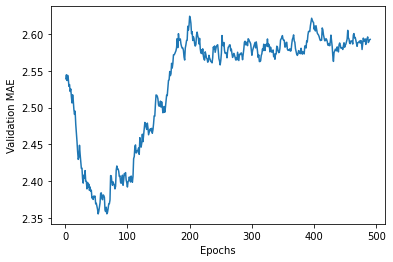

In [82]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * 
                                   factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, validation MAE stops improving significantly after 80 epochs.
Past that point, you start overfitting.<br>Once you’re finished tuning other parameters of the model (in addition to the
number of epochs, you could also adjust the size of the hidden layers), you can train a
final production model on all of the training data, with the best parameters, and then
look at its performance on the test data

In [83]:
model = build_model()

model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data,
                                                test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 18.2221 - mae: 2.8353


In [84]:
test_mae_score

2.835318088531494

## SUMMARY
Here’s what you should take away from this example:
<br>Regression is done using different loss functions than what we used for classification. Mean squared error ( MSE ) is a loss function commonly used for regression.<br>
Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. Acommon regression metric is mean absolute error ( MAE ).<br>
When features in the input data have values in different ranges, each featureshould be scaled independently as a preprocessing step.<br>
When there is little data available, using K-fold validation is a great way to reliably evaluate a model.<br>
When little training data is available, it’s preferable to use a small network with
few hidden layers (typically only one or two), in order to avoid severe overfitting.